* ref : https://scikit-learn.org/stable/search.html?q=cross_validation

In [1]:
import numpy as np
import pandas as pd
# from sklearn.linear_model import LinearRegression
import tensorflow as tf
from keras.models import Model

from sklearn.datasets import load_iris               #--------------- 데이터셋 
from sklearn.linear_model import LogisticRegression  #--------------- 모델

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# Dataset loading utilities

In [2]:
# load_iris(*, return_X_y=False, as_frame=False)[source]¶
dic = load_iris()
dic.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
dic['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## X  :: 독립변수
* train/test(7:3 8:2) dataset

In [4]:
dic['data'][:3] , len(dic['data'])

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]),
 150)

## y = target :: 종속변수
* (7:3 8:2) dataset

In [5]:
dic['target'], len(dic['target'])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 150)

In [6]:
dic['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(dic['data'], columns=dic['feature_names'])
# df = pd.DataFrame(dic['data'], columns=dic['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
df.columns=['sl','sw','pl','pw']
df.head(2)

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


# DataFrame + Series

## df[col] = 리스트값

In [8]:
df['target'] = dic['target']
df.head(2)

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


## concat

In [9]:
df = pd.DataFrame(dic['data'], columns=dic['feature_names'])
# df = pd.DataFrame(dic['data'], columns=dic['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
df.columns=['sl','sw','pl','pw']
df.head(2)

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [10]:
s = pd.Series(dic['target'], name='target')
s[:3]

0    0
1    0
2    0
Name: target, dtype: int32

In [11]:
df = pd.concat([df, s], axis=1)
df.head(3)

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
df.isna().sum()

sl        0
sw        0
pl        0
pw        0
target    0
dtype: int64

# EDA

## 정규성 (수치형 연속형)
* 정규분포(평균, 편차)를 따른다 -- 데이터들이 95% 확률로 존재한다는 가정
* 연속형(1.x) : x:구간  y:구간내에 몇개(빈도) --> 도수분포표를 시각화(히스토그램)
* 커널밀도함수 : 0~1사이의 확률값 (막대 면적:확률)

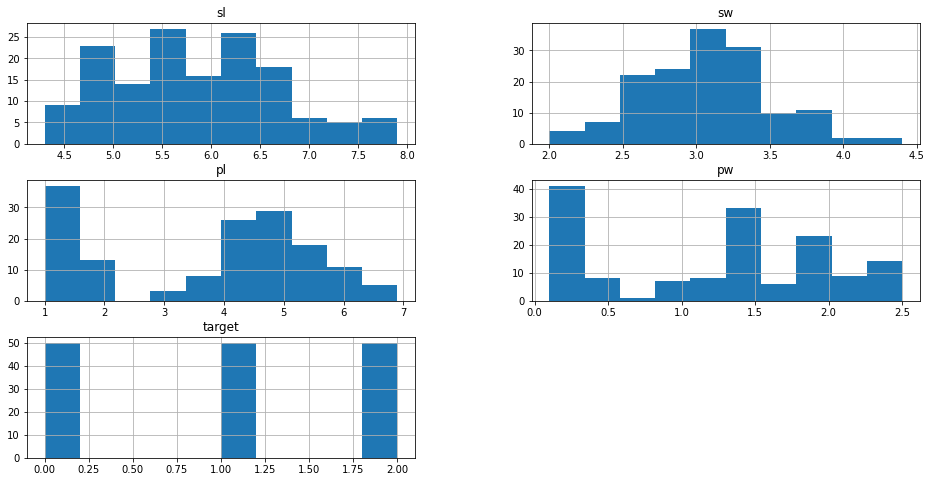

In [14]:
df.hist(figsize=(16,8))
plt.show()

In [15]:
df.describe()

,sl,sw,pl,pw,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


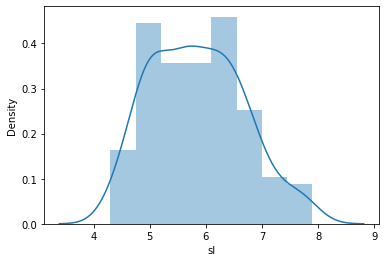

In [16]:
sns.distplot(df['sl'])
plt.show()

* 첨도가 크다 = 끝이 뾰족한다

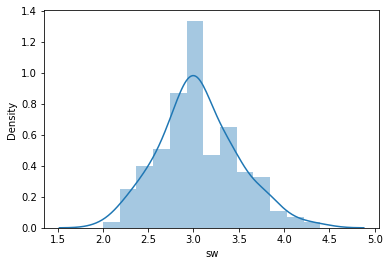

In [17]:
sns.distplot(df['sw'])
plt.show()

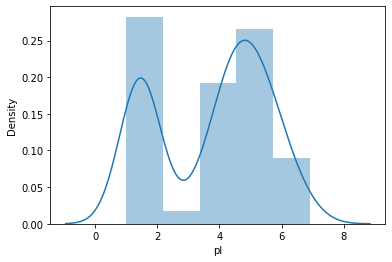

In [18]:
sns.distplot(df['pl'])
plt.show()

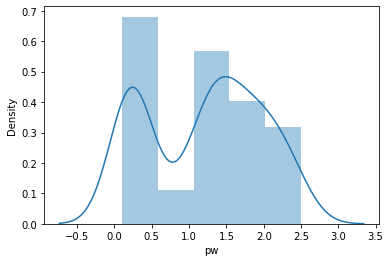

In [19]:
sns.distplot(df['pw'])
plt.show()

## 상관분석
* "두" 피쳐간의 관계
    * (+) : 양의 상관 ( A라는 피쳐가 커지면 B도 같이 커진다)
    * (-) : 음의 상관 ( A라는 피쳐가 커지면 B는 작아진다)
    * 상관계수 : 수치(크면 클수록 상관도가 높다)

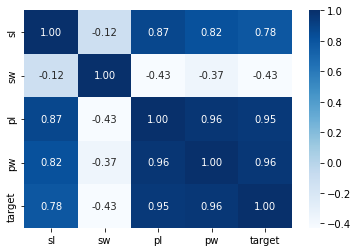

In [20]:
sns.heatmap(df.corr(), annot=True,  fmt=".2f", cmap="Blues")
plt.show()

* pw > pl > sl > sw 순으로 target과 상관관계가 있다.
* pw <--> pw (0.96) : 다중공선이 보인다
    * 버린다, 차원축소(PCA), 적은 피쳐로 학습해 모델예측도가 떨어지면 그냥 냅둔다

## 이상치(Outlier)
* sactter
* boxplot 

### boxplot

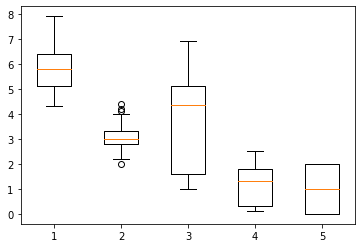

In [21]:
plt.boxplot(df)
plt.show()

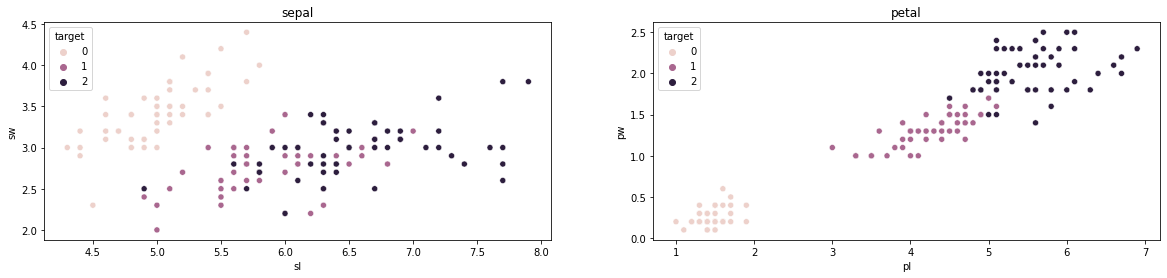

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20,4))
sns.scatterplot(x = 'sl', y = 'sw', data=df, hue="target",  ax = axes[0])
# sns.scatterplot(x = 'sl', y = 'sw', data=df[df['target']==1], hue="target",  ax = axes[1])
# sns.scatterplot(x = 'sl', y = 'sw', data=df[df['target']==2], hue="target",  ax = axes[2])
sns.scatterplot(x = 'pl', y = 'pw', data=df, hue="target",  ax = axes[1])

axes[0].set_title("sepal")
axes[1].set_title("petal")
plt.show()

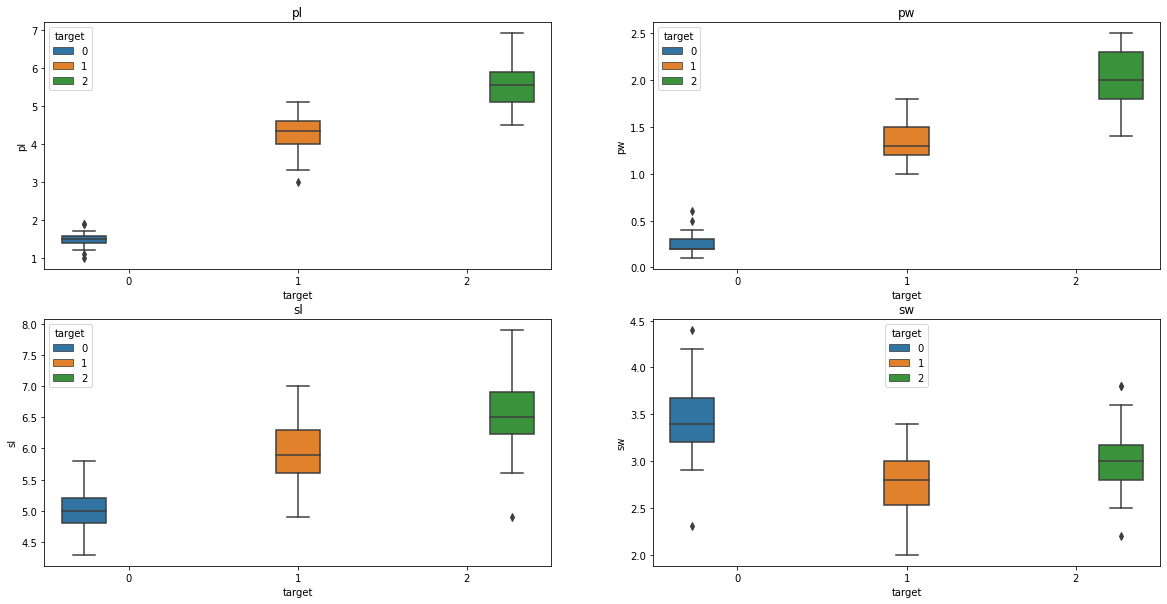

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.boxplot(x='target', y='pl',  data=df, hue="target",  ax = axes[0,0])
sns.boxplot(x='target', y='pw',  data=df, hue="target",  ax = axes[0,1])
sns.boxplot(x='target', y='sl',  data=df, hue="target",  ax = axes[1,0])
sns.boxplot(x='target', y='sw',  data=df, hue="target",  ax = axes[1,1])

axes[0,0].set_title("pl")
axes[0,1].set_title("pw")
axes[1,0].set_title("sl")
axes[1,1].set_title("sw")

plt.show()

### IQR

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/500px-Boxplot_vs_PDF.svg.png" width=300>

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcAqc6V%2FbtqyQLiddUd%2FiXQVu1nYTo2rx3Q8xZBqy0%2Fimg.png" width=600>

2.4875 3.4 0.4750000000000001 4.3875


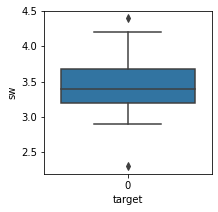

array([15, 41], dtype=int64)

In [24]:
fig = plt.figure(figsize=(3,3))
def outlier_detect(vtarget, col='sl' ):
    median  = np.percentile(df[df['target']==vtarget][col], 50)
    IQR     = np.percentile(df[df['target']==vtarget][col], 75) - np.percentile(df[df['target']==vtarget][col], 25)
    minimum = np.percentile(df[df['target']==vtarget][col], 25) - (1.5*IQR)
    maxmum  = np.percentile(df[df['target']==vtarget][col], 75) + (1.5*IQR)
    print(minimum, median, IQR, maxmum)
    sns.boxplot(x='target', y=col,  data=df[df['target']==vtarget])
    plt.show()
    return df[ ((df[col]<minimum) | (df[col]>maxmum)) &  (df['target']==vtarget)].index.values  


outlier_detect(vtarget=0, col='sw')

In [25]:
temp = df.describe()
print(temp.loc['25%','sl'])
temp

5.1


,sl,sw,pl,pw,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### scatter

<AxesSubplot:xlabel='sl', ylabel='sw'>

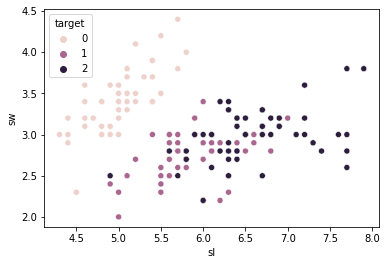

In [26]:
sns.scatterplot(x='sl', y='sw', data=df, hue='target')

<AxesSubplot:xlabel='pl', ylabel='pw'>

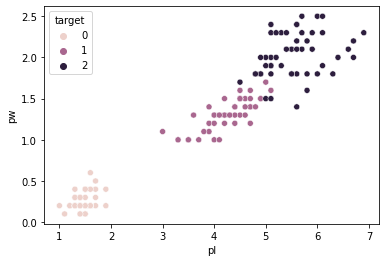

In [27]:
sns.scatterplot(x='pl', y='pw', data=df, hue='target')

<AxesSubplot:xlabel='pw', ylabel='pl'>

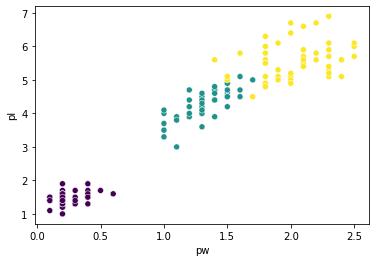

In [28]:
sns.scatterplot(data=df, x="pw", y="pl",  c=df['target'])

# 모델 학습 & 평가  
* ----------우선 점수보자
* 결측이 없다
* object 피쳐가 없다

## train, test 분리
* sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

In [29]:
df.shape

(150, 5)

In [30]:
from sklearn.model_selection import train_test_split

* 프레임채로 넣고 자르지 마세요.. 번거롭습니다.

In [31]:
# train_df, test_df = train_test_split(df, test_size=0.1,random_state=12121, shuffle=True)  #---, stratify=None
# train_df.shape , test_df.shape

# train_X = train_df.iloc[: , :-1]
# train_y = train_df['target']

# test_X = test_df.iloc[: , :-1]
# test_y = test_df['target']
# train_X.shape , test_X.shape,  train_y.shape,test_y.shape

In [43]:
X = df.iloc[: , :-1]
y = df['target']
print(X.shape, y.shape, type(X), type(y))
train_X,test_X,  train_y,test_y= train_test_split(X, y, test_size=0.3,random_state=1111, shuffle=True)  #---, stratify=None
print(train_X.shape , test_X.shape,  train_y.shape,test_y.shape)

(150, 4) (150,) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(105, 4) (45, 4) (105,) (45,)


## 학습 & 예측
* model.fit(train_X, train_y)  #--학습용 (135, 4)  (135,)
* computer_pred = model.predict(test_X)

In [44]:
model = LogisticRegression()
model.fit(train_X, train_y)
computer_pred  = model.predict(test_X)
computer_pred_proba = model.predict_proba(test_X)
print(test_X)
print(f"컴퓨터답안:{computer_pred}")
print(f"컴퓨터답안(P): {computer_pred_proba[:3]}")
print(f"실제test답안: {test_y.values}")

      sl   sw   pl   pw
49   5.0  3.3  1.4  0.2
122  7.7  2.8  6.7  2.0
12   4.8  3.0  1.4  0.1
70   5.9  3.2  4.8  1.8
100  6.3  3.3  6.0  2.5
72   6.3  2.5  4.9  1.5
36   5.5  3.5  1.3  0.2
99   5.7  2.8  4.1  1.3
90   5.5  2.6  4.4  1.2
79   5.7  2.6  3.5  1.0
92   5.8  2.6  4.0  1.2
142  5.8  2.7  5.1  1.9
33   5.5  4.2  1.4  0.2
84   5.4  3.0  4.5  1.5
128  6.4  2.8  5.6  2.1
4    5.0  3.6  1.4  0.2
65   6.7  3.1  4.4  1.4
82   5.8  2.7  3.9  1.2
19   5.1  3.8  1.5  0.3
120  6.9  3.2  5.7  2.3
95   5.7  3.0  4.2  1.2
41   4.5  2.3  1.3  0.3
59   5.2  2.7  3.9  1.4
27   5.2  3.5  1.5  0.2
16   5.4  3.9  1.3  0.4
6    4.6  3.4  1.4  0.3
3    4.6  3.1  1.5  0.2
145  6.7  3.0  5.2  2.3
56   6.3  3.3  4.7  1.6
58   6.6  2.9  4.6  1.3
103  6.3  2.9  5.6  1.8
10   5.4  3.7  1.5  0.2
138  6.0  3.0  4.8  1.8
51   6.4  3.2  4.5  1.5
67   5.8  2.7  4.1  1.0
101  5.8  2.7  5.1  1.9
131  7.9  3.8  6.4  2.0
60   5.0  2.0  3.5  1.0
46   5.1  3.8  1.6  0.2
71   6.1  2.8  4.0  1.3
113  5.7  2.5  5

## 평가
* ref : Metrics and scoring: quantifying the quality of predictions
* https://scikit-learn.org/stable/modules/model_evaluation.html

<table class="docutils align-default">
<colgroup>
<col style="width: 31%">
<col style="width: 40%">
<col style="width: 29%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Scoring</p></th>
<th class="head"><p>Function</p></th>
<th class="head"><p>Comment</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>Classification</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score" title="sklearn.metrics.accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘balanced_accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score" title="sklearn.metrics.balanced_accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.balanced_accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘top_k_accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.top_k_accuracy_score.html#sklearn.metrics.top_k_accuracy_score" title="sklearn.metrics.top_k_accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.top_k_accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘average_precision’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score" title="sklearn.metrics.average_precision_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.average_precision_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_brier_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss" title="sklearn.metrics.brier_score_loss"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.brier_score_loss</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘f1’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>for binary targets</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_micro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>micro-averaged</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_macro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>macro-averaged</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>weighted average</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_samples’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>by multilabel sample</p></td>
</tr>
<tr class="row-odd"><td><p>‘neg_log_loss’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss" title="sklearn.metrics.log_loss"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.log_loss</span></code></a></p></td>
<td><p>requires <code class="docutils literal notranslate"><span class="pre">predict_proba</span></code> support</p></td>
</tr>
<tr class="row-even"><td><p>‘precision’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" title="sklearn.metrics.precision_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.precision_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p>‘recall’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" title="sklearn.metrics.recall_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.recall_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-even"><td><p>‘jaccard’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score" title="sklearn.metrics.jaccard_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.jaccard_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovo’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovo_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
</tbody>
</table>

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

<pre>
* sklearn.metrics.<b>accuracy_score(y_true, y_pred</b>, *, normalize=True, sample_weight=None)

* sklearn.metrics.<b>classification_report(y_true, y_pred</b>, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn') </pre>
---- 
<pre>
<font color=red><b>이진분류 : average = {‘binary’} , default=’binary’}</b></font>
<font color=red><b>멀티분류 : average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’}</b></font>
* sklearn.metrics.<b>f1_score(y_true, y_pred</b>, *, labels=None, pos_label=1, <b>average='binary'</b>, sample_weight=None, zero_division='warn')
    
* sklearn.metrics.<b>recall_score(y_true, y_pred</b>, *, labels=None, pos_label=1, <b>average='binary'</b>, sample_weight=None, zero_division='warn')

* sklearn.metrics.<b>precision_score(y_true, y_pred</b>, *, labels=None, pos_label=1, <b>average='binary'</b>, sample_weight=None, zero_division='warn')
</pre>

---- 
<pre>
* <font color=red><b>y_true, y_score 파라미터 주의주의주의</b></font>
* <font color=blue>average{‘micro’, ‘macro’, ‘samples’, ‘weighted’} or None, default=’macro’ --- Will be ignored when y_true is binary.</font>
* <font color=blue>multi_class{‘raise’, ‘ovr’, ‘ovo’}, default=’raise’</font>
* sklearn.metrics.<font color=red><b>roc_auc_score(y_true, y_score,</b></font> *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)


In [48]:
acc       = accuracy_score  ( test_y, computer_pred)
f1        = f1_score        ( test_y, computer_pred,       average = 'macro')
recall    = recall_score    ( test_y, computer_pred,       average = 'macro')
precision = precision_score ( test_y, computer_pred,       average = 'macro')
roc_auc   = roc_auc_score   ( test_y, computer_pred_proba, average = 'macro', multi_class="ovr")
print(f"정확도:{acc:.4f}  \t f1:{f1:.4f} \t 재현률(recall):{recall:.4f} \t 정밀도(precision):{precision:.4f} \t roc:{roc_auc:.4f}   ")

정확도:0.9556  	 f1:0.9558 	 재현률(recall):0.9558 	 정밀도(precision):0.9558 	 roc:0.9955   


In [47]:
print(classification_report(test_y, computer_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [49]:
from sklearn.metrics import confusion_matrix

* sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)


In [50]:
confusion_matrix(test_y, computer_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)